# Hand Written Recognition System

## Importing Necessary Libraries

In [1]:
import numpy #used for numerical analysis
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataser
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A layer consists of a tensor-in tensor-out computation function
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense layer is the regular deeply connected neural network layer
#Faltten-used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #Convolutional layer
from keras.optimizers import Adam #optimizer
from keras.utils import np_utils #used for one-hot encoding

## Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #splitting the mnist data into train and test


In [3]:
print(X_train.shape)#shape is used for give the dimension values #60000-rows 28x28-pixels 
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Understanding the data

In [4]:
X_train[0]#printing the first image


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]#printing lable of first image

5

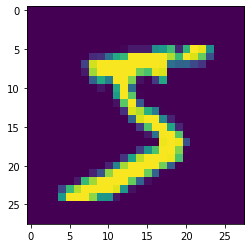

In [6]:
import matplotlib.pyplot as plt #used for data visualization
plt.imshow(X_train[0]) #ploting the index=0 image

## Reshaping Dataset

In [7]:
# Reshaping to format which CNN expects (batch, height, width, channels)
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

## One-Hot Encoding

In [8]:
# one hot encode
number_of_classes = 10 #storing the no. classes in a variable
y_train = np_utils.to_categorical(y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
y_train[0] #printing the new label

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Creating the Model

In [10]:
# create model
model = Sequential() 
# adding model layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(Conv2D(32, (3, 3), activation='relu'))
#flatten the dimension of the image
model.add(Flatten())
#output layer with 10 neurons
model.add(Dense(number_of_classes, activation='softmax'))

## Compiling the model

In [11]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

## Fitting the model

In [12]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 138s 73ms/step - loss: 0.7690 - accuracy: 0.9085 - val_loss: 0.0818 - val_accuracy: 0.9749
Epoch 2/5
1875/1875 [==============================] - 146s 78ms/step - loss: 0.0653 - accuracy: 0.9800 - val_loss: 0.0955 - val_accuracy: 0.9733
Epoch 3/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0397 - accuracy: 0.9868 - val_loss: 0.0923 - val_accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0317 - accuracy: 0.9893 - val_loss: 0.0958 - val_accuracy: 0.9764
Epoch 5/5
1875/1875 [==============================] - 106s 56ms/step - loss: 0.0223 - accuracy: 0.9932 - val_loss: 0.1069 - val_accuracy: 0.9749


## Observing the metrics

In [13]:
# Final evaluation of the model
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.10694464296102524, 0.9749000072479248]


## Predicting the output

In [14]:
prediction=model.predict(X_test[:4])
print(prediction)


[[1.18835538e-13 2.03619575e-21 1.83181313e-12 2.60275940e-10
  4.36274543e-17 3.31485497e-15 6.36256018e-20 1.00000000e+00
  2.88022942e-13 4.85437281e-11]
 [5.07338083e-09 2.76211876e-09 1.00000000e+00 1.81214212e-14
  1.10250325e-16 3.00107711e-17 3.16796728e-10 4.69308393e-21
  1.34106849e-11 1.19122983e-18]
 [6.93307078e-10 9.99956131e-01 5.56454268e-07 1.77731430e-12
  2.46973359e-05 1.44245915e-09 1.34262157e-08 9.69924141e-10
  1.86194284e-05 9.75605818e-09]
 [1.00000000e+00 5.59103663e-15 1.19961230e-09 9.75457711e-15
  5.30500019e-11 6.87411282e-12 1.06257119e-08 6.40121799e-13
  1.63326736e-13 1.08040403e-08]]


In [15]:
import numpy as np
print(np.argmax(prediction,axis=1)) #printing our labels from first 4 images
print(y_test[:4]) #printing the actual labels

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Taking images as input and checking results

In [17]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import load_model
model = load_model(r'/Users/tarunnamburi/Desktop/Hand_Written_Finder/models/mnistCNN.h5')
from PIL import Image#used for manipulating image uploaded by the user.
import numpy as np#used for numerical analysis
for index in range(4):
    img = Image.open('data/' + str(index) + '.png').convert("L")# convert image to monochrome
    img = img.resize((28,28))# resizing of input image
    im2arr = np.array(img) #converting to image
    im2arr = im2arr.reshape(1,28,28,1) #reshaping according to our requirement
    # Predicting the Test set results
    y_pred = model.predict(im2arr) #predicting the results
    print(y_pred)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Saving the model

In [18]:
# Save the model
model.save('models/mnistCNN.h5')